In [11]:
import pandas as pd
# Import SQL Alchemy
from sqlalchemy import create_engine
from config import sqlpass
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [6]:
dbConnectionString = "postgres://postgres:{}@ajishra.us:781/mystery".format(sqlpass)

In [7]:
# Create Database Connection
# ----------------------------------
# Establish Connection
engine = create_engine(dbConnectionString)
dbconn = engine.connect()

In [9]:
salaries=pd.read_sql_query('''select emp_no as "Employee Number", salary as "Salary" from salaries''',dbconn)

In [10]:
salaries

,Employee Number,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
199995,299971,40000
199996,299972,84832
199997,299973,63007
199998,299974,40000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1362112d0>]],
      dtype=object)

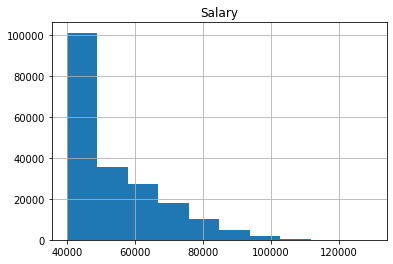

In [136]:
#Create a histogram to visualize the most common salary ranges for employees.
Salary_Bins = np.arange(salaries.Salary.astype(int).min()-10000,salaries.Salary.astype(int).max()+10000,10000)
labels=['30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','100000-110000','110000-120000','120000-130000']
SalaryAnalysis=pd.DataFrame({"Salary":salaries["Salary"].astype(int)})
SalaryAnalysis["Salary Range"]=pd.cut(SalaryAnalysis["Salary"],Salary_Bins,labels=labels,right=True)
SalaryAnalysis.hist()

In [32]:
#Create a bar chart of average salary by title.
SalaryByTitle=pd.read_sql_query('''select t.emp_no as "EmployeeNo",t.title as "Title",s.salary as "Salary" 
from titles t join salaries s on t.emp_no=s.emp_no''',dbconn)

In [69]:
TitleGroup=SalaryByTitle.Title.unique()
i=0
data=[]
for title in TitleGroup:
    #print(title)
    #print(round(SalaryByTitle[SalaryByTitle["Title"] == title].Salary.astype(int).mean(),2))
    SalaryMean=round(SalaryByTitle[SalaryByTitle["Title"] == title].Salary.astype(int).mean(),2)
    data.append(SalaryMean)
    if (i==0):
        Analysis=pd.DataFrame({"Title": title,"Average Salary" : [SalaryMean]}).set_index('Title')
    else:
        df=pd.DataFrame({"Title": title,"Average Salary" : [SalaryMean]}).set_index('Title')
        Analysis=Analysis.append(df)
    i=i+1
Analysis

,Average Salary
Title,
Senior Engineer,48502.66
Engineer,48522.08
Staff,58465.58
Technique Leader,48589.43
Assistant Engineer,48531.52
Senior Staff,58481.88
Manager,51531.04


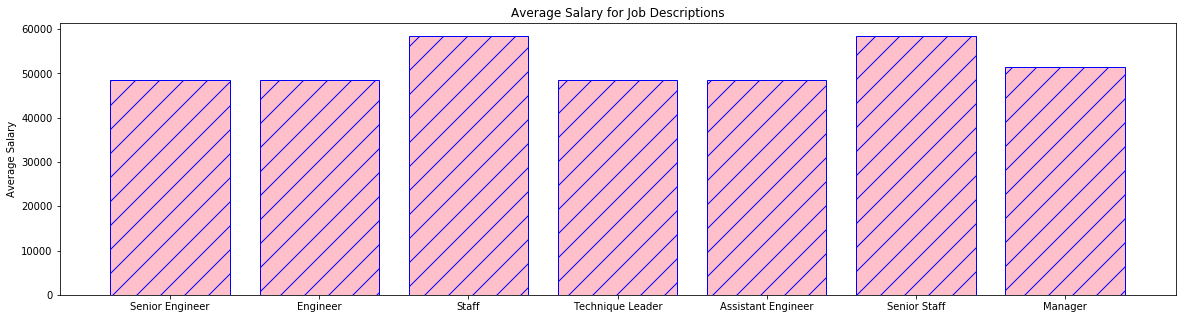

In [85]:
columns=TitleGroup
n_rows = len(data)
rows = ['%d dollars' % x for x in (100, 50, 20, 10, 5)]
plt.figure(figsize=(20,5))
plt.bar(Analysis.index,Analysis["Average Salary"],color='pink', edgecolor='blue', hatch="/")
plt.ylabel("Average Salary")
plt.title('Average Salary for Job Descriptions')
plt.savefig("./output/AverageSalaryForJob.png")
plt.show()